Voici un code utilsant une autre metric la F1 score 

La différence entre l'accuracy et la F1 score :
   - l'accuracy mesure la proportion de prédictions correctes parmi toutes les prédictions
   - F1 score prend en compte non seulement les prédictions correctes mais également les faux positifs et les faux négatifs.
   
Concept F1 score : 
 - précision : nombre de vrais positifs /  nombre total de prédictions positives
 - rappel    : nombre de vrais positifs /  nombre total d'exemples positifs
 - et ensuite calcul la moyenne 

Pourquoi opter pour cette metric, cette metric sera plus importante dans ce cas, car dans le cas de test sur les poumons, on aura normalement des scanner non equitable (plus de poumons sain que de poumon malade par exemple) 


Found 5216 files belonging to 2 classes.
Using 4173 files for training.
Found 16 files belonging to 2 classes.
Using 3 files for validation.
Found 624 files belonging to 2 classes.
Epoch 1/10
131/131 [==============================] - 108s 805ms/step - loss: 0.4849 - recall_1: 0.9481 - val_loss: 0.7965 - val_recall_1: 1.0000
Epoch 2/10
131/131 [==============================] - 104s 783ms/step - loss: 0.2569 - recall_1: 0.9773 - val_loss: 0.5184 - val_recall_1: 1.0000
Epoch 3/10
131/131 [==============================] - 102s 769ms/step - loss: 0.2272 - recall_1: 0.9721 - val_loss: 0.4431 - val_recall_1: 1.0000
Epoch 4/10
131/131 [==============================] - 108s 819ms/step - loss: 0.2098 - recall_1: 0.9705 - val_loss: 0.5066 - val_recall_1: 1.0000
Epoch 5/10
131/131 [==============================] - 109s 822ms/step - loss: 0.1977 - recall_1: 0.9701 - val_loss: 0.4091 - val_recall_1: 1.0000
Epoch 6/10
131/131 [==============================] - 108s 819ms/step - loss: 0.1771 - re

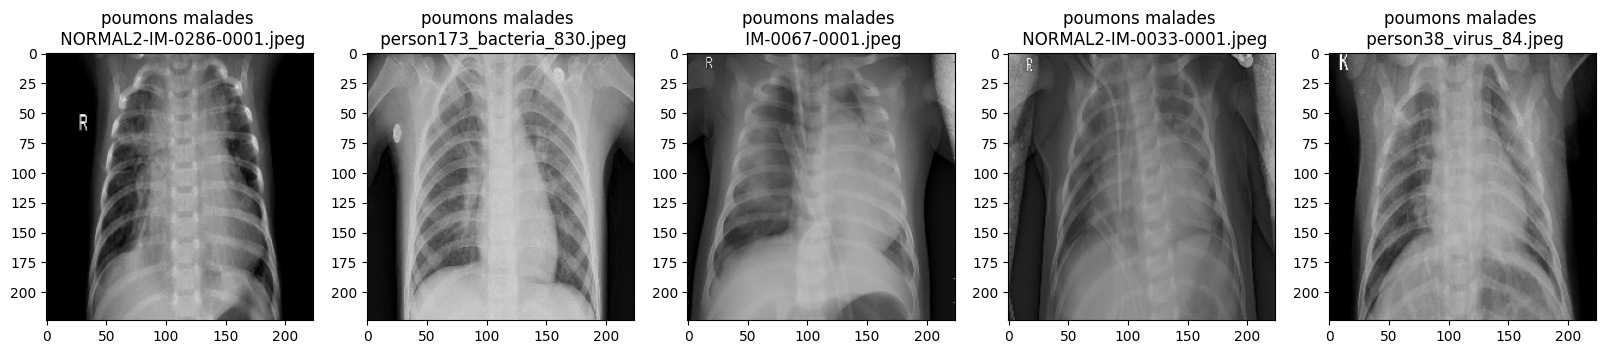

In [3]:
import os
import random
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    '../train',
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.2,
    seed=42, 
    subset='training',
    shuffle=True
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    '../val',
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.2,
    seed=42, 
    subset='validation',
    shuffle=True
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    '../test',
    batch_size=32,
    image_size=(224, 224)
)

train_data = train_data.prefetch(buffer_size=32)
val_data = val_data.prefetch(buffer_size=32)
test_data = test_data.prefetch(buffer_size=32)

model = models.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])

history = model.fit(train_data, validation_data=val_data, epochs=10)

# Évaluation du modèle sur l'ensemble de test
test_images = np.concatenate([x for x, y in test_data], axis=0)
test_labels = np.concatenate([y for x, y in test_data], axis=0)
test_predictions = model.predict(test_images)

# Calcul de la précision rappel sur l'ensemble de test
recall = recall_score(test_labels, test_predictions > 0.5)
print(f"Précision rappel sur l'ensemble de test: {recall}")


# Partie affichage image 

# Obtient le chemin vers le dossier de test
test_dir = '../test'

# Crée un Dataset contenant les noms de fichiers des images du dossier de test
test_filenames = tf.data.Dataset.list_files(os.path.join(test_dir, '*/*'))

# Convertit le Dataset en liste et extrait les noms de fichiers
test_filenames = list(test_filenames)
test_filenames = [os.path.basename(file.numpy()).decode('utf-8') for file in test_filenames]

# Sélectionne et affiche 5 images aléatoires du jeu de données de test
fig, axs = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
    random_index = random.randint(0, len(test_images) - 1)
    test_filename = test_filenames[random_index]
    test_image = test_images[random_index]
    test_label = test_labels[random_index]
    test_image_norm = test_image / 255.0
    predictions = model.predict(np.array([test_image]))
    prediction = "poumons malades" if predictions[0][0] > 0.5 else "poumons sains"
    axs[i].imshow(test_image_norm, cmap="gray")
    axs[i].set_title(f"{prediction} \n {test_filename}")
plt.show()
